In [1]:
import torch 
import torch.nn as nn 

import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("diabetes_data.csv", sep = ";")
df.head(n=5)

encoder = LabelEncoder()
encoder.fit(df.gender)
df['gender'] = encoder.transform(df.gender)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
feature_cols = df.columns[:-1]
target_cols = df.columns[-1]

X, y = np.array(df[feature_cols]), np.array(df[target_cols])
scaler.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<AxesSubplot:>

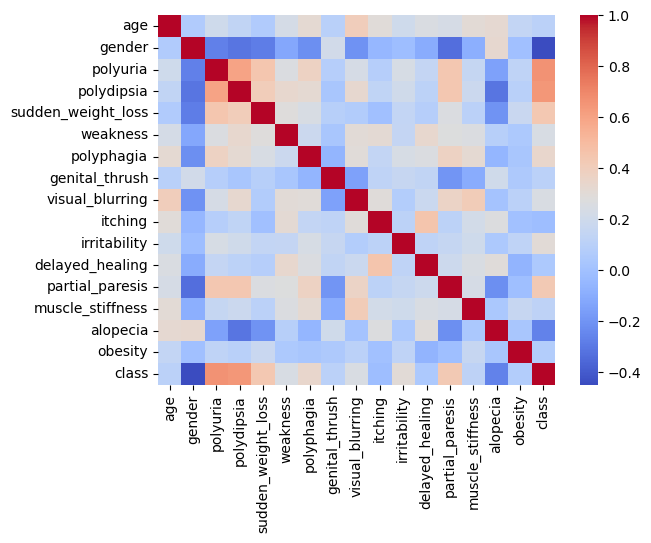

In [4]:
import seaborn as sns 

tc = df.corr()
sns.heatmap(tc, annot = False, cmap = "coolwarm", label = "Correlation Map")

In [5]:
num_features = int(len(df.columns)) - 1
print(num_features)

16


In [6]:
class LogisticRegressionNeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LogisticRegressionNeuralNet, self).__init__()
        
        self.linear_1 = nn.Linear(input_dim, hidden_dim)
        self.sig_1 = nn.Sigmoid()
        self.linear_2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        outputs = self.linear_1(x)
        outputs = self.sig_1(outputs)
        outputs = self.linear_2(outputs)
        return outputs 

learning_rate = 0.01
model = LogisticRegressionNeuralNet(input_dim = num_features, hidden_dim = 10, output_dim = 2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [7]:
batch_size = 100
n_iters = 3000
n_epochs = n_iters / (len(X_train) / batch_size)
n_epochs = int(n_epochs)
print(n_epochs)

721


In [8]:
from torch.autograd import Variable
import tqdm

X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((n_epochs,))
accuracy_list = np.zeros((n_epochs,))

In [9]:
for epoch in tqdm.trange(n_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 721/721 [00:00<00:00, 2232.11it/s]


In [10]:
print(loss_list)

[0.68666369 0.68608576 0.68555301 0.68506038 0.68460315 0.68417782
 0.68378109 0.68341023 0.68306279 0.68273664 0.68243003 0.68214142
 0.68186927 0.68161243 0.68136948 0.68113983 0.68092215 0.68071568
 0.68051964 0.68033344 0.68015635 0.67998761 0.67982703 0.67967379
 0.67952758 0.67938793 0.67925423 0.6791265  0.67900407 0.67888671
 0.67877418 0.67866611 0.67856222 0.67846233 0.67836607 0.6782735
 0.67818415 0.67809772 0.67801446 0.67793381 0.67785603 0.67778039
 0.67770714 0.67763609 0.67756706 0.67750001 0.67743468 0.67737126
 0.67730939 0.67724901 0.67719018 0.67713267 0.67707658 0.67702162
 0.67696792 0.67691529 0.67686373 0.67681313 0.67676359 0.67671496
 0.67666721 0.67662036 0.67657429 0.67652899 0.67648453 0.67644078
 0.67639762 0.6763553  0.67631346 0.67627239 0.6762318  0.67619193
 0.67615259 0.67611396 0.6760757  0.67603809 0.67600089 0.6759643
 0.67592812 0.67589259 0.67585731 0.67582262 0.67578852 0.67575467
 0.67572129 0.67568845 0.6756559  0.67562383 0.67559212 0.675560